In [1]:
import pickle

with open('trainX.pkl', 'rb') as f:
    trainX = pickle.load(f)

with open('testX.pkl', 'rb') as f:
    testX = pickle.load(f)

with open('trainY.pkl', 'rb') as f:
    trainY = pickle.load(f)

with open('testY.pkl', 'rb') as f:
    testY = pickle.load(f)

with open('valX.pkl', 'rb') as f:
    valX = pickle.load(f)

with open('valY.pkl', 'rb') as f:
    valY = pickle.load(f)

with open('le.pkl', 'rb') as f:
    le = pickle.load(f)


In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [5]:
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Activation, Dropout,BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report


## CNN convolutional neural network (keras)

In [6]:
s=150
batch_size = 40
epochs = 50

In [7]:
model = Sequential()

model.add(layers.InputLayer(input_shape=(s,s,3)))

model.add(Conv2D(filters = 8, kernel_size =(3,3), activation = "relu", padding = 'same'))
model.add(Conv2D(filters = 8, kernel_size =(3,3), activation = "relu", padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(1,1)))

model.add(Conv2D(filters = 16, kernel_size =(3,3), activation = "relu", padding = 'same'))
model.add(Conv2D(filters = 16, kernel_size =(3,3), activation = "relu", padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))


model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", padding = 'same'))
model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu", padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu", padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(filters = 512, kernel_size =(3,3), activation = "relu", padding = 'same'))
model.add(AveragePooling2D(pool_size = (2,2), strides = (2,2)))


model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "softmax"))

In [8]:
model.compile(optimizer = 'adam',
              loss= keras.losses.categorical_crossentropy,
              metrics= ['accuracy']
             )

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 8)       584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 149, 149, 16)      1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 149, 149, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 74, 74, 32)        4

In [10]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 3,
    verbose = 1,
    restore_best_weights = True
)

In [11]:
aug = ImageDataGenerator(rotation_range=0, zoom_range=0,width_shift_range=0.2, 
                         height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

In [12]:
CNNmodel = model.fit(aug.flow(trainX, trainY, batch_size=batch_size),
                     epochs=epochs,
                     callbacks = [early_stopping],
                     validation_data = (valX,valY),
                     verbose=1
)

Epoch 1/50
339/339 [==============================] - 46s 128ms/step - loss: 1.0423 - accuracy: 0.5478 - val_loss: 0.8626 - val_accuracy: 0.6749
Epoch 2/50
339/339 [==============================] - 40s 118ms/step - loss: 0.8495 - accuracy: 0.6518 - val_loss: 0.7821 - val_accuracy: 0.6802
Epoch 3/50
339/339 [==============================] - 40s 118ms/step - loss: 0.7767 - accuracy: 0.6849 - val_loss: 0.7353 - val_accuracy: 0.7130
Epoch 4/50
339/339 [==============================] - 40s 118ms/step - loss: 0.7386 - accuracy: 0.6990 - val_loss: 0.6964 - val_accuracy: 0.7192
Epoch 5/50
339/339 [==============================] - 40s 118ms/step - loss: 0.6962 - accuracy: 0.7235 - val_loss: 0.6264 - val_accuracy: 0.7744
Epoch 6/50
339/339 [==============================] - 41s 119ms/step - loss: 0.6618 - accuracy: 0.7398 - val_loss: 0.5781 - val_accuracy: 0.7868
Epoch 7/50
339/339 [==============================] - 40s 118ms/step - loss: 0.6155 - accuracy: 0.7606 - val_loss: 0.5812 - val_ac

In [21]:
modelLoss, modelAccuracy = model.evaluate(aug.flow(testX, testY))

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))



133/133 [==============================] - 12s 92ms/step - loss: 0.3087 - accuracy: 0.8901
Test Loss is 0.3087168037891388
Test Accuracy is 0.8901488184928894


In [22]:
# modelLoss, modelAccuracy = model.evaluate(trainX, trainY, verbose=0)

# print('Test Loss is {}'.format(modelLoss))
# print('Test Accuracy is {}'.format(modelAccuracy ))



In [23]:
# classification report on train
# predIdxs = model.predict(trainX, batch_size=batch_size)
# predIdxs = np.argmax(predIdxs, axis=1)
# print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

In [24]:
# classification report on test

predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.18873   0.19917   0.19381       723
Lung Opacity    0.28897   0.27454   0.28157      1202
      Normal    0.47473   0.47916   0.47693      2039
   Pneumonia    0.05185   0.05204   0.05195       269

    accuracy                        0.34609      4233
   macro avg    0.25107   0.25123   0.25107      4233
weighted avg    0.34626   0.34609   0.34609      4233



In [25]:
class_names = ['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia']
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[11])])

Lung Opacity


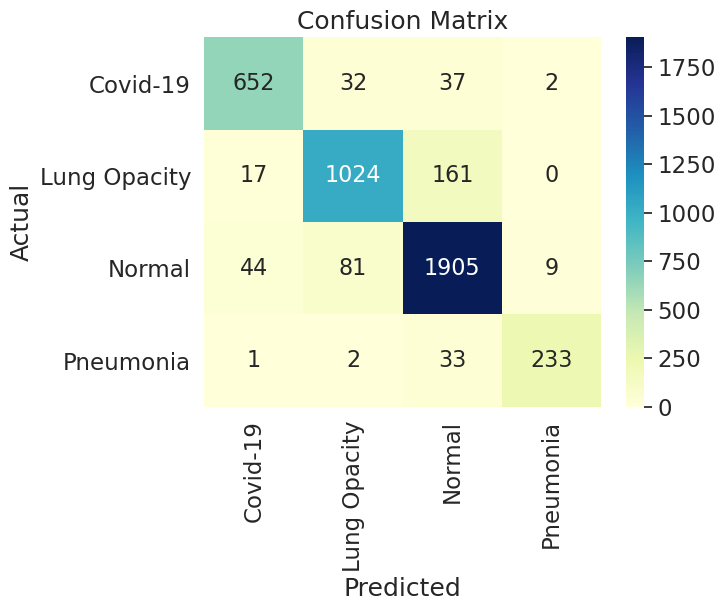

In [30]:
# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x,index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

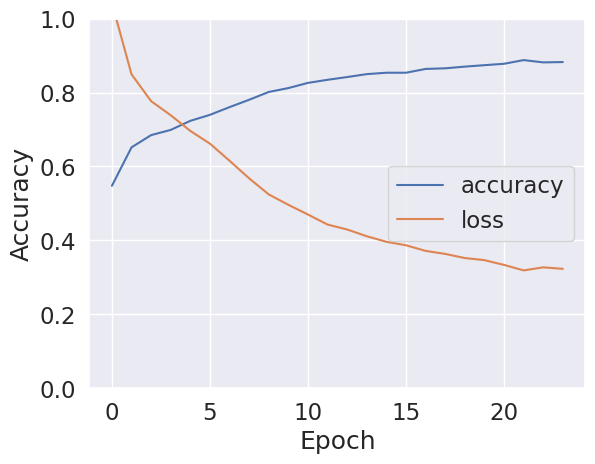

In [29]:
plt.plot(CNNmodel.history['accuracy'], label='accuracy')
plt.plot(CNNmodel.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='center right')
plt.show()

In [20]:
model.save('CNN_Covid19_Xray_V1.h5') 